In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
fitness = pd.read_csv('/mnt/New_Volume/Work_From_Home/Data/CardioGoodFitness.csv')
fitness.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
fitness.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


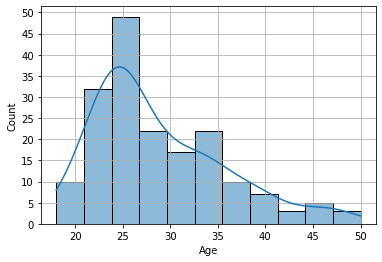

In [11]:
sns.histplot(data = fitness, x = 'Age', kde= True)
plt.grid()
plt.yticks([x for x in range(0,51,5)])
plt.show()

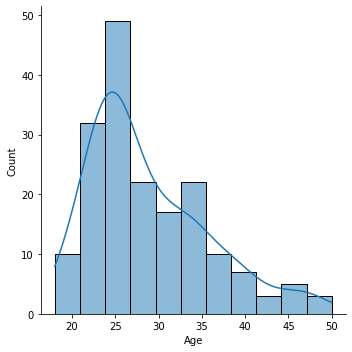

In [8]:
sns.displot(data = fitness, x = 'Age', kde= True)

<AxesSubplot:>

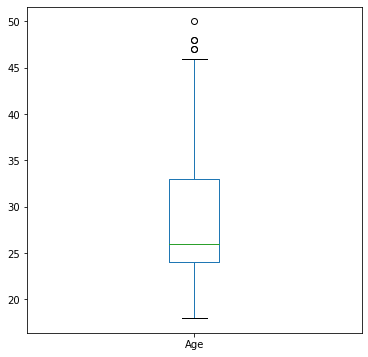

In [13]:
fitness['Age'].plot(kind = 'box', figsize= (6,6))

In [16]:
fitness['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

<AxesSubplot:ylabel='Product'>

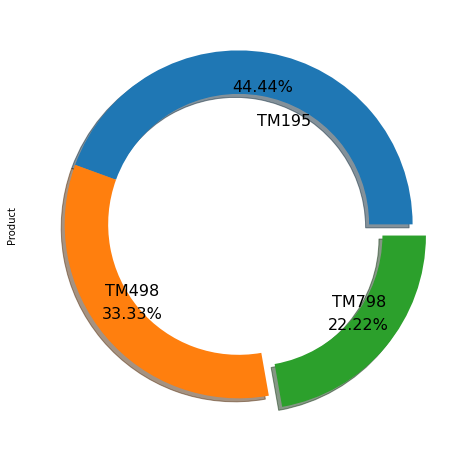

In [46]:
fitness['Product'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (8,8), textprops = {'size':16, 'color':'k'},
pctdistance = 0.8,labeldistance = 0.6, explode = [0,0,0.1], shadow = True, wedgeprops = {'width':0.25})

# fitness['Gender'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (8,8), textprops = {'size':16, 'color':'k'},
# pctdistance = 0.8,labeldistance = 0.6, shadow = True, wedgeprops = {'width':0.25}, radius= 0.5)

In [42]:
plt.pie?

Signature:
plt.pie(
    x,
    explode=None,
    labels=None,
    colors=None,
    autopct=None,
    pctdistance=0.6,
    shadow=False,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    *,
    normalize=None,
    data=None,
)
Docstring:
Plot a pie chart.

Make a pie chart of array *x*.  The fractional area of each wedge is
given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
the fractional area directly and the array will not be normalized. The
resulting pie will have an empty wedge of size ``1 - sum(x)``.

The wedges are plotted counterclockwise, by default starting from the
x-axis.

Parameters
----------
x : 1D array-like
    The wedge sizes.

explode : array-like, default: None
    If not *None*, is a ``len(x)`` array which specifies the fraction
    of the radius with which to offset each wedge.

labels : list, default: None
    A se

# Bar Plot

In [70]:
tm_195 = fitness['Gender'][fitness['Product'] == 'TM195']
tm_498 = fitness['Gender'][fitness['Product'] == 'TM498']
tm_798 = fitness['Gender'][fitness['Product'] == 'TM798']

In [74]:
tm_195.value_counts()

Female    40
Male      40
Name: Gender, dtype: int64

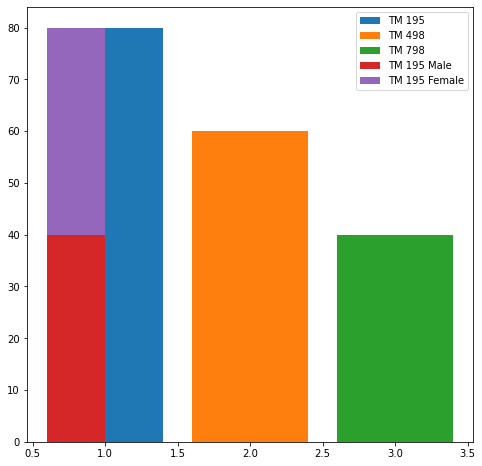

In [79]:
plt.figure(figsize= (8,8))
plt.bar(1,len(tm_195), label = 'TM 195')
plt.bar(2,len(tm_498), label = 'TM 498')
plt.bar(3,len(tm_798), label = 'TM 798')
plt.bar(0.8,tm_195.value_counts()[1], label = 'TM 195 Male', width=0.4)
plt.bar(0.8,tm_195.value_counts()[0], label = 'TM 195 Female', width=0.4,bottom =tm_195.value_counts()[1] )
plt.legend()
plt.show()

In [69]:
x = fitness.groupby(by = 'Product')
x.get_group('TM798')['Gender'].value_counts()

Male      33
Female     7
Name: Gender, dtype: int64

In [80]:
# Bi variate Analysis

x = fitness.corr()
x

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

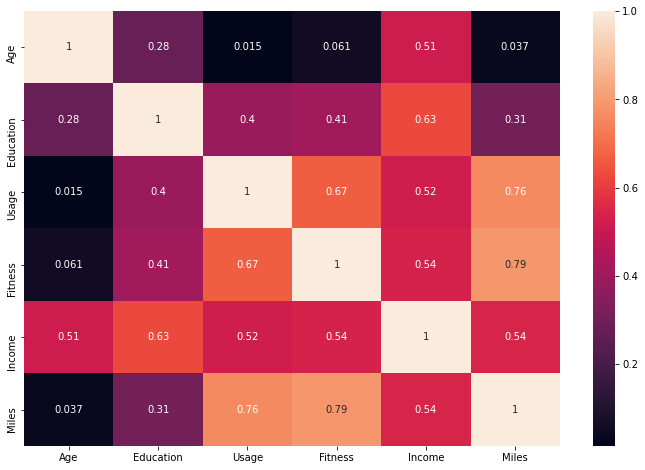

In [84]:
plt.figure(figsize=(12,8))
sns.heatmap(x, annot= True)

In [87]:
from pandas.plotting import scatter_matrix

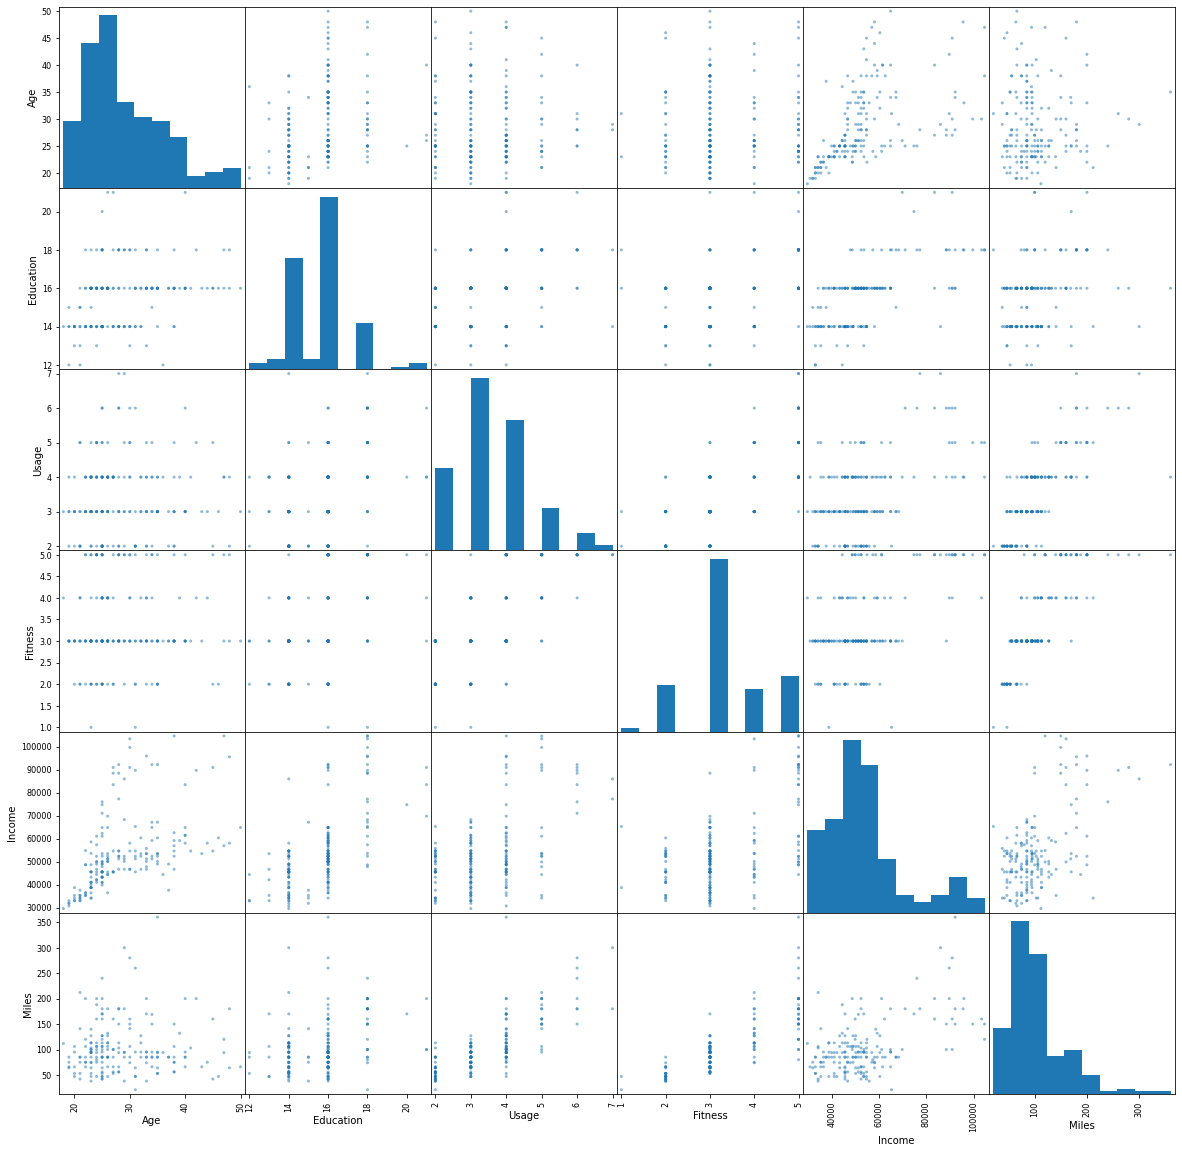

In [88]:
scatter_matrix(fitness, figsize = (20,20))
plt.show()

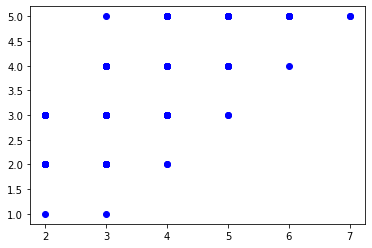

In [97]:
plt.plot(fitness['Usage'], fitness['Fitness'],'bo')